In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
# read dataset
dataset = pd.read_csv('./py-master-codebasics/py-master/ML/16_regularization/Melbourne_housing_FULL.csv')

In [9]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [10]:
dataset.shape

(34857, 21)

In [11]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [12]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 
               'Propertycount', 'Distance','CouncilArea','Bedroom2','Bathroom',
              'Car', 'Landsize','BuildingArea','Price']
dataset = dataset[cols_to_use]


In [13]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [14]:
#  rechanging na values in these cols to 0
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [15]:
#  for these cols we are taking the mean in place of na vals
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.Landsize.mean())


In [16]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [17]:
# dropping the remaining the columns where na values are present from seen above
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [18]:
dataset = pd.get_dummies(dataset, drop_first=True) 
dataset.head()
# drop_first=True helps in reducing the extra column created during 
# dummy variable creation

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,593.598993,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.000000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.000000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,593.598993,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.000000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


#### Doing some EDA before deciding the x and y for our model


In [19]:
# plt.figure(figsize=(8,6))
# sns.distplot(dataset['Bedroom2'],dataset['Price'])
# plt.show()

In [20]:
df = dataset.copy()

In [21]:
df.shape

(27244, 745)

In [22]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Propertycount']])
df['Propertycount'] = scaler.transform(df[['Propertycount']])
scaler.fit(df[['Price']])
df['Price'] = scaler.transform(df[['Price']])

In [23]:
df.shape

(27244, 745)

In [24]:
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,0.182501,2.5,2.0,1.0,1.0,202.0,593.598993,0.125506,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.182501,2.5,2.0,1.0,0.0,156.0,79.000000,0.085470,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0.182501,2.5,3.0,2.0,0.0,134.0,150.000000,0.124157,0,...,0,0,0,0,0,0,0,0,1,0
5,3,0.182501,2.5,3.0,2.0,1.0,94.0,593.598993,0.068826,0,...,0,0,0,0,0,0,0,0,1,0
6,4,0.182501,2.5,3.0,1.0,2.0,120.0,142.000000,0.136302,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
dataset.max()

Rooms                                        16.0
Propertycount                             21650.0
Distance                                     48.1
Bedroom2                                     20.0
Bathroom                                      9.0
                                           ...   
CouncilArea_Whitehorse City Council           1.0
CouncilArea_Whittlesea City Council           1.0
CouncilArea_Wyndham City Council              1.0
CouncilArea_Yarra City Council                1.0
CouncilArea_Yarra Ranges Shire Council        1.0
Length: 745, dtype: float64

<BarContainer object of 27244 artists>

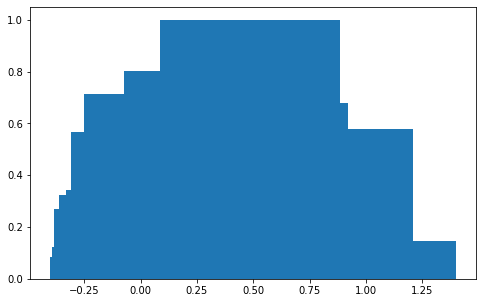

In [26]:
plt.figure(figsize=(8,5))
plt.bar(df.Propertycount,df.Price)

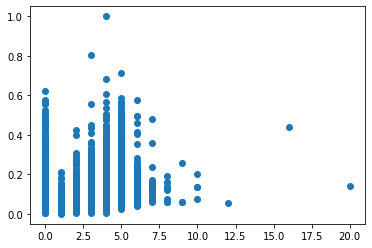

In [27]:
plt.scatter(df.Bedroom2, df.Price)

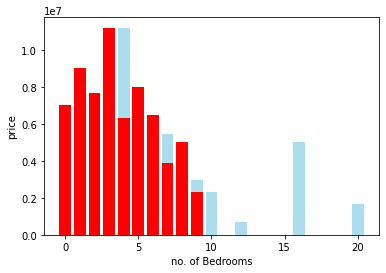

In [28]:
plt.bar(df.Bedroom2, dataset.Price, color = '#acddef')
plt.bar(df.Bathroom, dataset.Price, color = 'red')
# plt.xticks([1,2,3,4,5,6,7,8,9])
plt.xlabel('no. of Bedrooms')
plt.ylabel('price')
plt.show()

In [35]:
df_price = dataset.sort_values(by='Price', ascending=True)

In [36]:
df_Bedroom2 = dataset.sort_values(by='Bedroom2', ascending=True)

In [37]:
df_propertycount = dataset.sort_values(by='Propertycount', ascending=True)

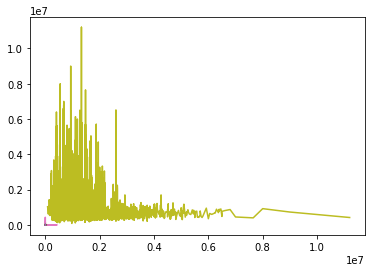

In [32]:
plt.plot(df_price, df_propertycount)
plt.show()

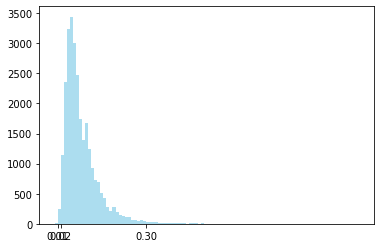

In [33]:

plt.hist(df.Price,bins=100, color = '#acddef')
plt.xticks([0.01, 0.02, 0.3])
plt.show()

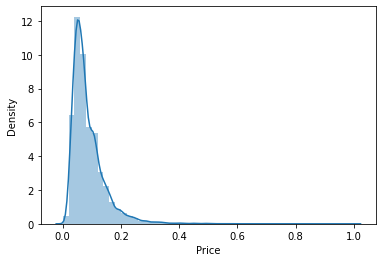

In [34]:
sns.distplot(df['Price'])
plt.show()

In [113]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,0.182501,2.5,2.0,1.0,1.0,202.0,593.598993,0.125506,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.182501,2.5,2.0,1.0,0.0,156.0,79.000000,0.085470,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0.182501,2.5,3.0,2.0,0.0,134.0,150.000000,0.124157,0,...,0,0,0,0,0,0,0,0,1,0
5,3,0.182501,2.5,3.0,2.0,1.0,94.0,593.598993,0.068826,0,...,0,0,0,0,0,0,0,0,1,0
6,4,0.182501,2.5,3.0,1.0,2.0,120.0,142.000000,0.136302,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

In [ ]:
# ------------------------------

In [16]:
x = dataset.drop('Price', axis=1)
y= dataset['Price']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [19]:
reg.score(x_test,y_test)

0.6545357056627452

In [20]:
reg.score(x_train,y_train)

0.6804433770514438

In [32]:
from sklearn import svm

In [34]:
msvr = svm.SVR(kernel='linear')

In [36]:
# msvr = SVC(kernel='linear', C=10)
msvr.fit(x_train,y_train)
msvr.score(x_test, y_test)

0.012613596008666073

In [37]:
# from sklearn.metrics import confusion_metrics
# confusion_metrics(x_test,y_test)

In [23]:
# Clearly the model is overfitted
#  Here we can see that the scores are very low as the model struggles when
# new test data is provided to it
#  TO solve this -

In [24]:
# Lasso regression is L1 regularization and 
# regid regression is L2 regularization


from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter=150, tol=0.1)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=150, tol=0.1)

In [25]:
lasso_reg.score(x_test, y_test)

0.672826835257621

In [26]:
lasso_reg.score(x_train, y_train)

0.6761877940563645

In [27]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [28]:
ridge_reg.score(x_test, y_test)

0.6672390717223875

In [29]:
lasso_reg.score(x_train, y_train)

0.6761877940563645

In [30]:
y_pred = lasso_reg.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
185163566990.58664

185163566990.58664